# Support Vector Machines - Pulsar Prediction

## 1. Importing Python Packages and Data

In [41]:
# Import Python Packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import scikitplot.metrics as skplt

In [2]:
#Storing the data files into pandas dataframes
train_df = pd.read_csv(r'E:/IITm/Sem 7/Data Analytics Lab/Assignment 6 Nov 28th/pulsar_data_train.csv')
test_df = pd.read_csv(r'E:/IITm/Sem 7/Data Analytics Lab/Assignment 6 Nov 28th/pulsar_data_test.csv')

#Preview train dataset
train_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
test_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [4]:
train_df.shape

(12528, 9)

In [5]:
test_df.shape

(5370, 9)

We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is `target_class` variable. It is also the target variable.

In [6]:
# view the column names of the dataframe

col_names = train_df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

 There are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.

In [7]:
# remove leading spaces from column names

train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

In [8]:
# view column names again

train_df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

The leading spaces have been removed

In [9]:
# rename column names

train_df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']
test_df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [10]:
train_df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

We can see that the column names are shortened. **IP** stands for `integrated profile` and **DM-SNR** stands for `delta modulation and signal to noise ratio`. Now, it is much more easy to work with the columns.

In [11]:
# check distribution of target_class column

train_df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [12]:
# view the percentage distribution of target_class column

train_df['target_class'].value_counts()/float(len(train_df))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [13]:
# view summary of dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


## 2. Exploratory Analysis

**Explore Missing Values**

In [14]:
# check for missing values in variables

train_df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

 As we can see, there are missing values in the dataset in the variables `IP Kurtosis`,`DM-SNR Sd`and `DM-SNR Skewness`.

In [15]:
round(train_df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,10793.00,12528.00,12528.00,11350.00,12528.00,11903.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.53,0.09
std,25.67,6.80,1.06,6.21,29.61,19.61,4.54,107.40,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.02,-0.19,1.91,14.40,5.80,35.20,0.00
50%,115.18,46.93,0.22,0.20,2.79,18.41,8.45,83.13,0.00
75%,127.11,50.98,0.47,0.93,5.41,28.34,10.73,140.00,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


In [16]:
# Make copies of the dataframes
traindata = train_df.copy()
testdata = test_df.copy()

**IP Kurtosis missing values**

In [17]:
#mean IP Kurtosis
print('Mean of "IP Kurtosis" is %.2f' %(train_df["IP Kurtosis"].mean(skipna=True)))

#median IP Kurtosis
print('Median of "IP Kurtosis" is %.2f' %(train_df["IP Kurtosis"].median(skipna=True)))

Mean of "IP Kurtosis" is 0.48
Median of "IP Kurtosis" is 0.22


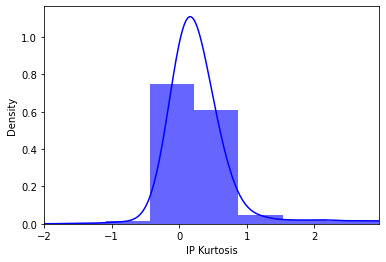

In [18]:
ax = train_df["IP Kurtosis"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.6)
train_df["IP Kurtosis"].plot(kind='density', color='blue')
ax.set(xlabel='IP Kurtosis')
plt.xlim(-2,2.96)
plt.show()

The distribution is not highly skewed. So the missing values can be replaced with the mean values.

**DM-SNR missing values**

In [19]:
#mean DM-SNR SD
print('Mean of "DM-SNR Sd" is %.2f' %(train_df["DM-SNR Sd"].mean(skipna=True)))

#median DM-SNR SD
print('Median of "DM-SNR Sd" is %.2f' %(train_df["DM-SNR Sd"].median(skipna=True)))

Mean of "DM-SNR Sd" is 26.35
Median of "DM-SNR Sd" is 18.41


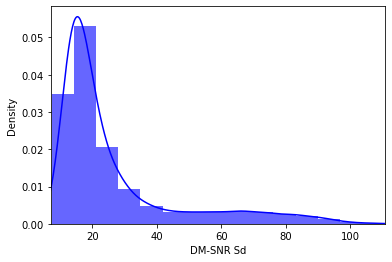

In [20]:
ax = train_df["DM-SNR Sd"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.6)
train_df["DM-SNR Sd"].plot(kind='density', color='blue')
ax.set(xlabel='DM-SNR Sd')
plt.xlim(7,111)
plt.show()

The distribution is heavily right skewed, so mean cannot be used to replace the missing values. The missing values will be replaced by the median.

**DM-SNR Skewness missing values** 

In [21]:
#mean DM-SNR SD
print('Mean of "DM-SNR Skewness" is %.2f' %(train_df["DM-SNR Skewness"].mean(skipna=True)))

#median DM-SNR SD
print('Median of "DM-SNR Skewness" is %.2f' %(train_df["DM-SNR Skewness"].median(skipna=True)))

Mean of "DM-SNR Skewness" is 105.53
Median of "DM-SNR Skewness" is 83.13


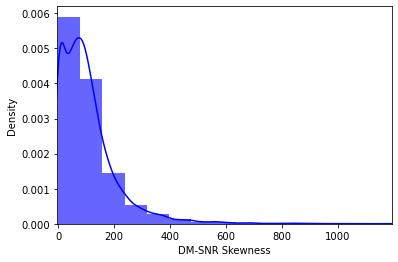

In [22]:
ax = train_df["DM-SNR Skewness"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.6)
train_df["DM-SNR Skewness"].plot(kind='density', color='blue')
ax.set(xlabel='DM-SNR Skewness')
plt.xlim(-5,1192)
plt.show()

The distribution is heavily right skewed, so mean cannot be used to replace the missing values. The missing values will be replaced by the median.

In [23]:
# replace Missing values of IP Kurtosis with the mean/median value 

traindata["IP Kurtosis"]= traindata["IP Kurtosis"].fillna(train_df["IP Kurtosis"].mean(skipna=True))
traindata["DM-SNR Sd"]= traindata["DM-SNR Sd"].fillna(train_df["DM-SNR Sd"].median(skipna=True))
traindata["DM-SNR Skewness"]= traindata["DM-SNR Skewness"].fillna(train_df["DM-SNR Skewness"].median(skipna=True))

testdata["IP Kurtosis"]=testdata["IP Kurtosis"].fillna(test_df["IP Kurtosis"].mean(skipna=True))
testdata["DM-SNR Sd"]=testdata["DM-SNR Sd"].fillna(test_df["DM-SNR Sd"].median(skipna=True))
testdata["DM-SNR Skewness"]=testdata["DM-SNR Skewness"].fillna(test_df["DM-SNR Skewness"].median(skipna=True))

In [24]:
traindata.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.988230,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.289934,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.478548,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [25]:
traindata.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

All the missing values have been replaced.

**Visualizing outliers in the dataset by drawing boxplots**

Text(0, 0.5, 'DM-SNR Skewness')

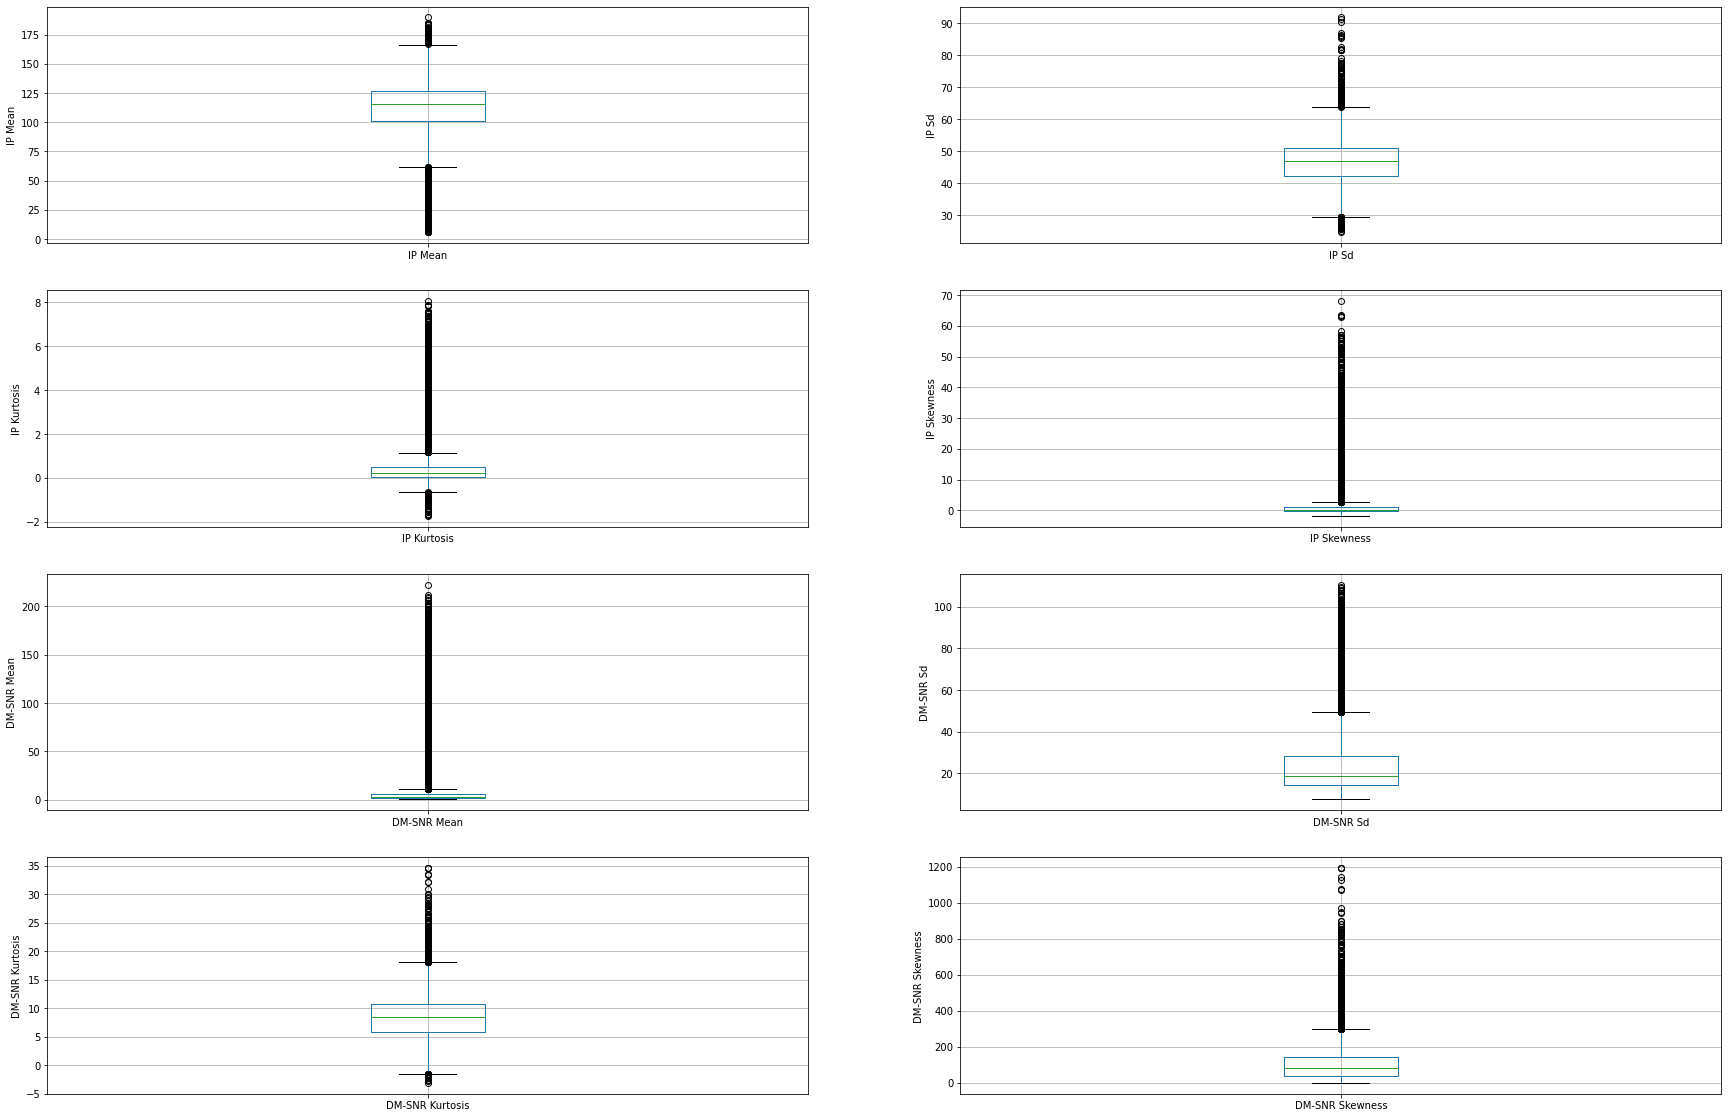

In [26]:
plt.figure(figsize=(30,20))


plt.subplot(4, 2, 1)
fig = train_df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = train_df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = train_df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = train_df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = train_df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = train_df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = train_df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = train_df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

**Check the distribution of variables**

Text(0, 0.5, 'Number of pulsar stars')

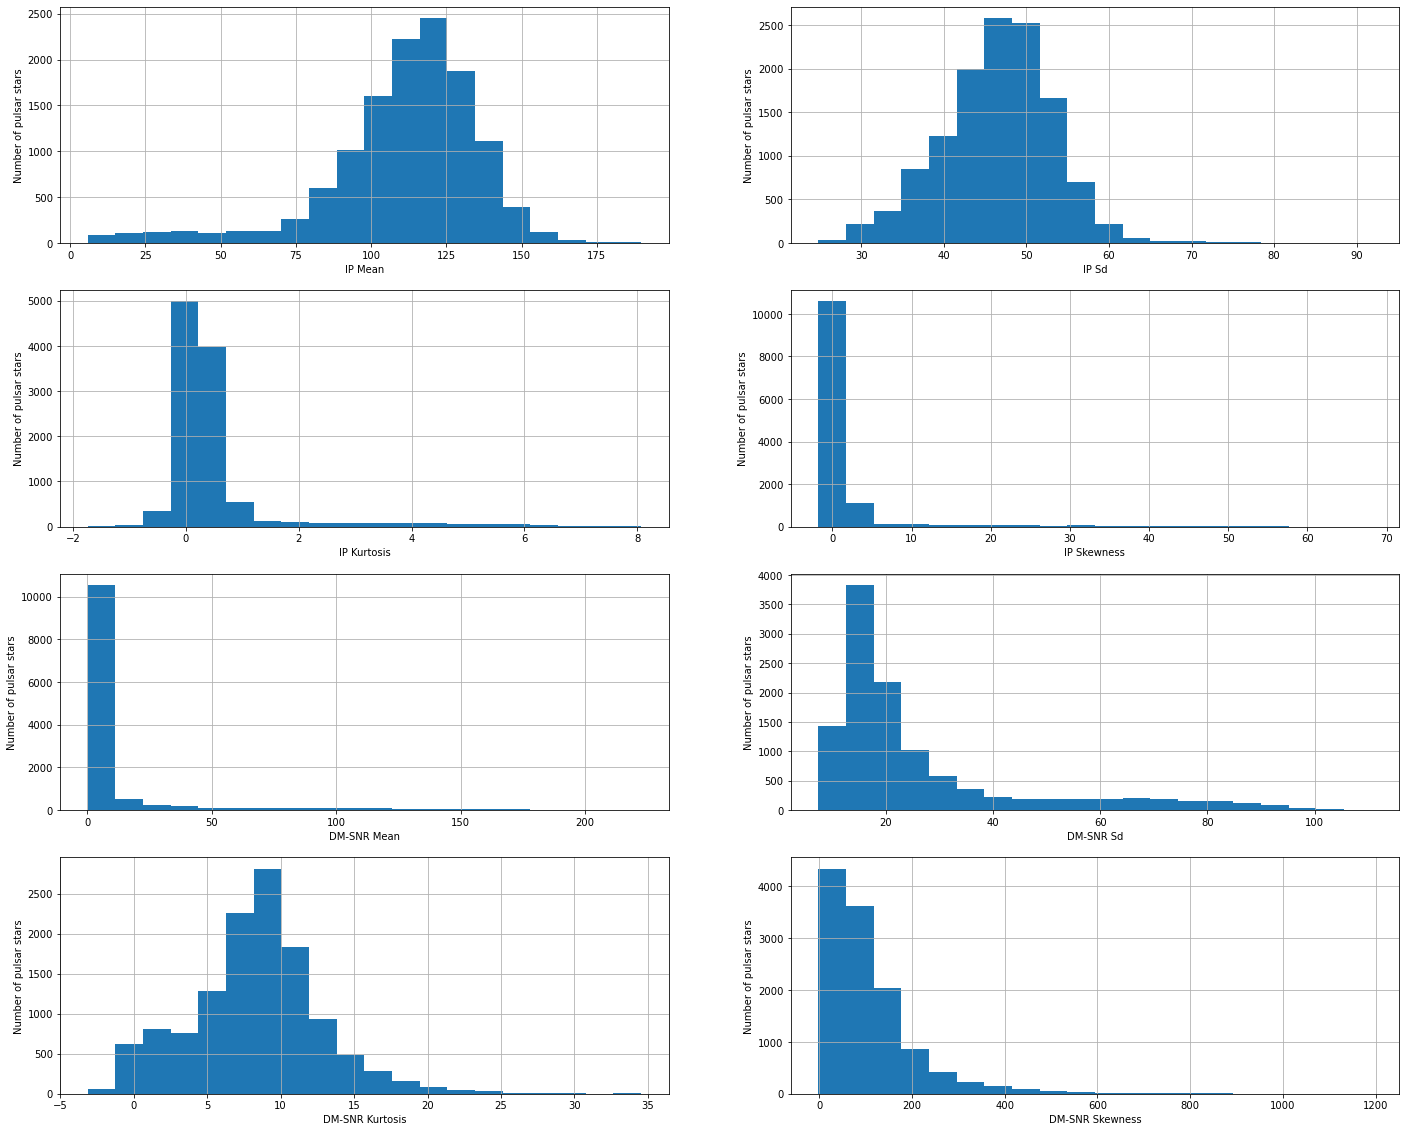

In [27]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = train_df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = train_df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = train_df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = train_df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = train_df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = train_df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = train_df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = train_df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

We can see that all the 8 continuous variables are skewed.

In [28]:
#import seaborn 
import seaborn as sns

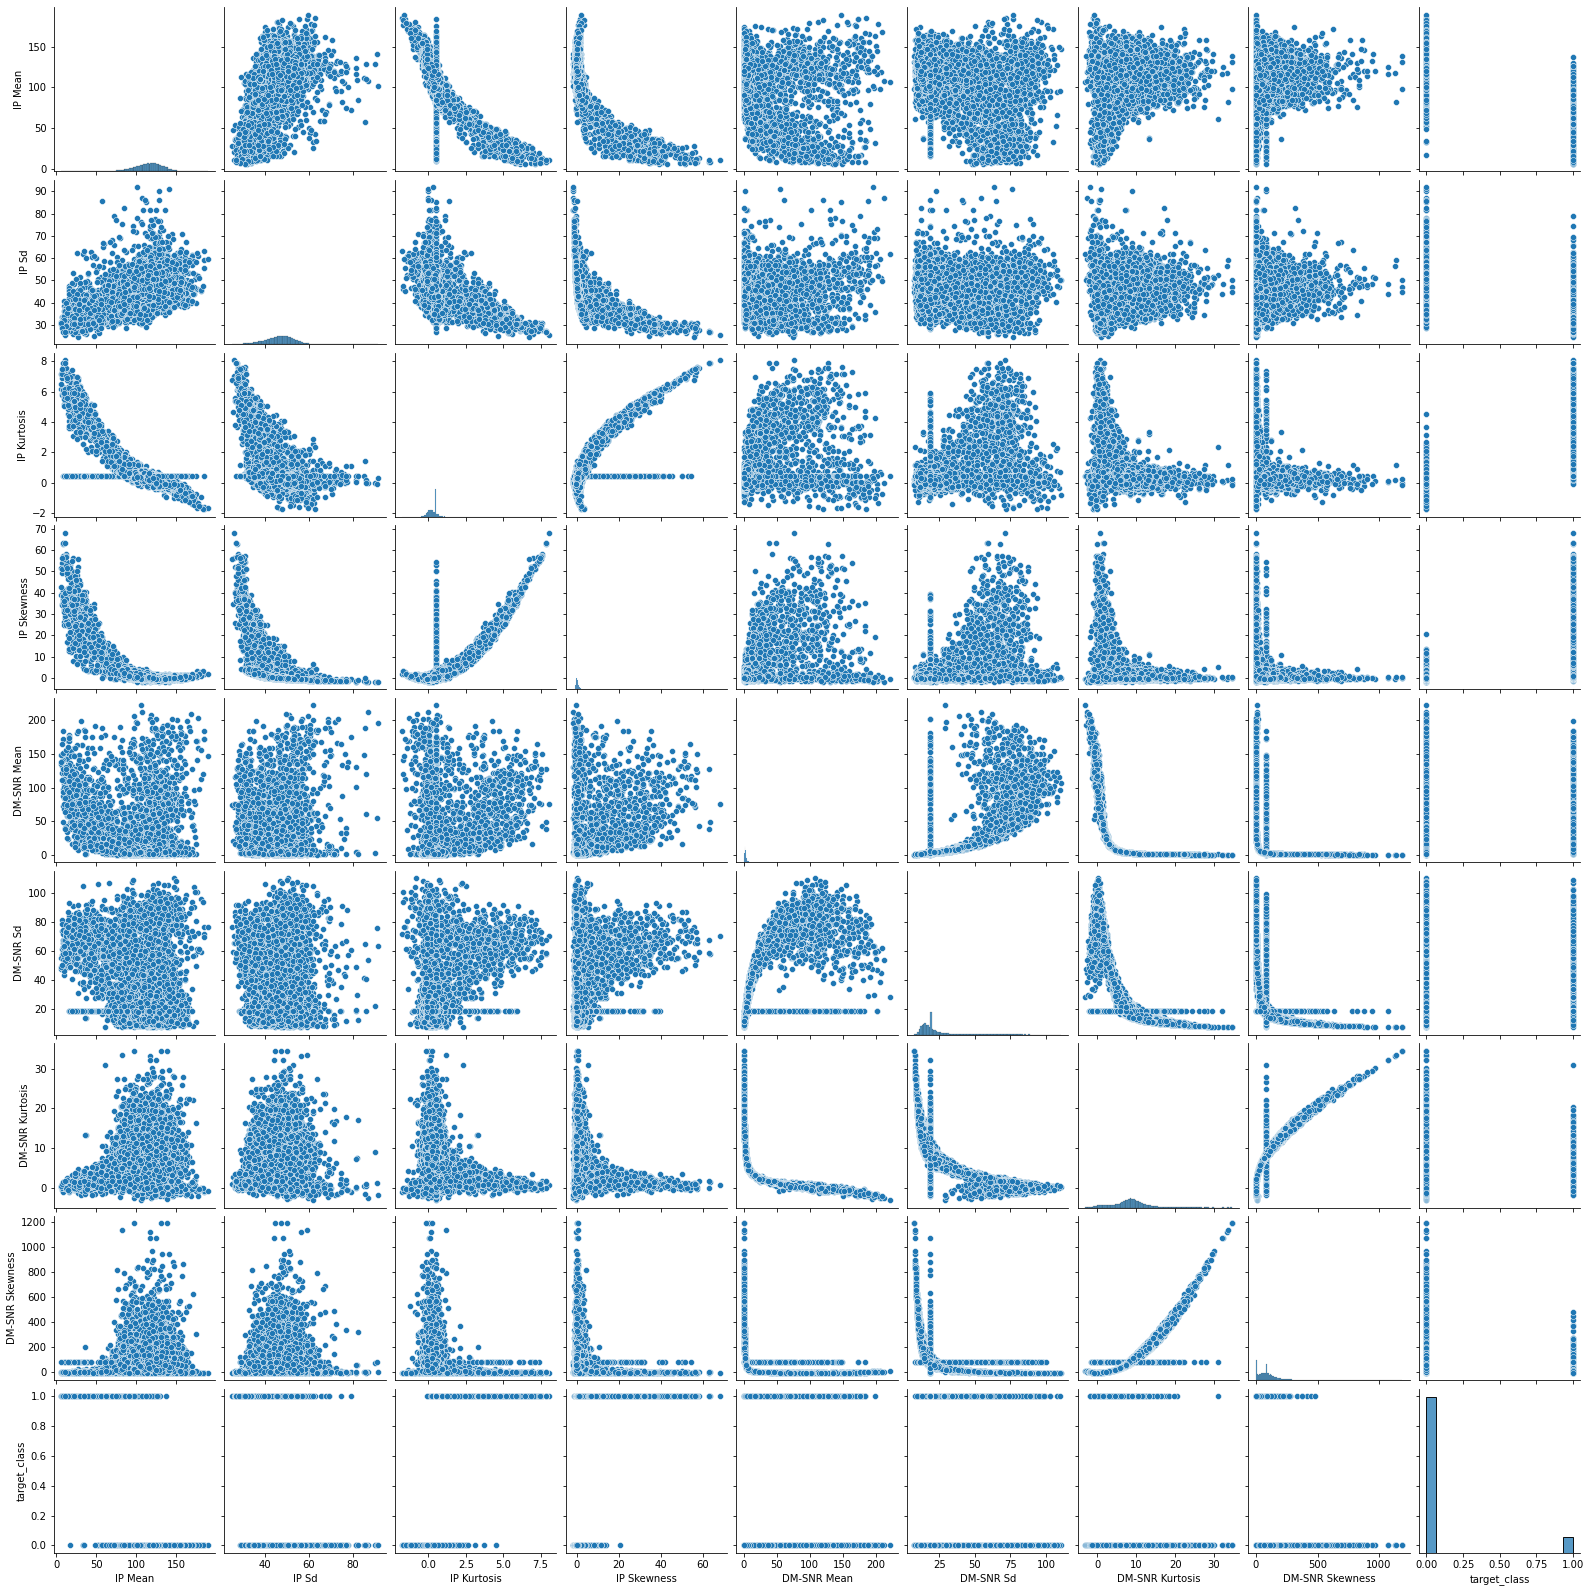

In [29]:
sns.pairplot(traindata)

<AxesSubplot:>

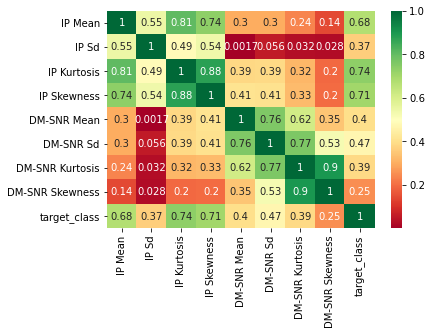

In [30]:
sns.heatmap(traindata.corr().abs(), annot=True, cmap = "RdYlGn")

## 3. Model Feature Selection

**Declare feature vector and target variable**

**Split the Train dataset into Train and Test dataset**

In [31]:
X_train_tot = traindata.drop(['target_class'], axis=1)

y_train_tot = traindata['target_class']

In [32]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_tot, y_train_tot, test_size = 0.2, random_state = 0)

In [33]:
X_train_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      12528 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        12528 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  12528 non-null  float64
dtypes: float64(8)
memory usage: 783.1 KB


In [34]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10022, 8), (2506, 8))

**Feature Scaling**

In [35]:
cols = X_train.columns

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [37]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [38]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [39]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-2.459299e-16,-7.557537e-16,-1.001771e-16,-3.175468e-17,-3.442722e-17,-3.279323e-17,-1.339313e-16,1.089951e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.059253e+00,-3.121855e+00,-2.221072e+00,-5.703669e-01,-4.225211e-01,-9.679603e-01,-2.526379e+00,-1.014557e+00
25%,-3.943394e-01,-6.101706e-01,-4.261366e-01,-3.175801e-01,-3.653436e-01,-5.767818e-01,-5.589324e-01,-6.338157e-01
50%,1.619199e-01,5.986146e-02,-1.916573e-01,-2.549120e-01,-3.355278e-01,-3.831715e-01,2.442155e-02,-2.028493e-01
75%,6.265131e-01,6.579129e-01,-6.261144e-03,-1.397269e-01,-2.459675e-01,5.550782e-02,5.276848e-01,2.991024e-01
max,3.045294e+00,6.647182e+00,7.578695e+00,1.045442e+01,7.074053e+00,4.501370e+00,5.769814e+00,1.036396e+01


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

### Run SVM with default hyperparameters 

Default hyperparameter means C=1.0, kernel=`rbf` and gamma=`auto` among other parameters.

In [40]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9796


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

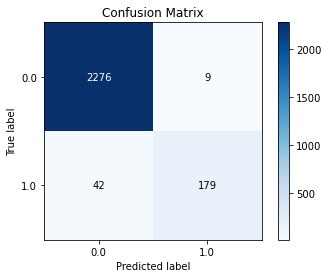

In [42]:
skplt.plot_confusion_matrix(y_test, y_pred)

### Run SVM with rbf kernel and C=100.0
We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=`rbf` and C=100.0.

In [43]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9796


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

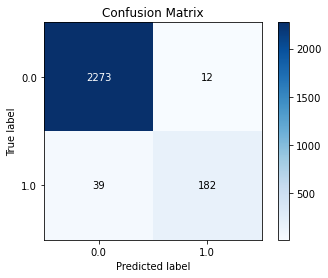

In [44]:
skplt.plot_confusion_matrix(y_test, y_pred)

Further increase the value of C=1000.0 and check accuracy.

In [45]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9808


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

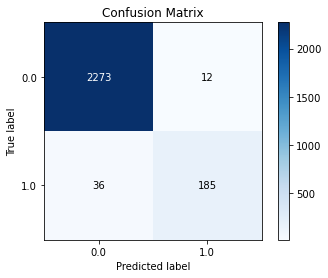

In [46]:
skplt.plot_confusion_matrix(y_test, y_pred)

We can see some improvement in the accuracy at C=1000.

### Run SVM with linear kernel 
**Run SVM with linear kernel and C=1.0**

In [47]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9781


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

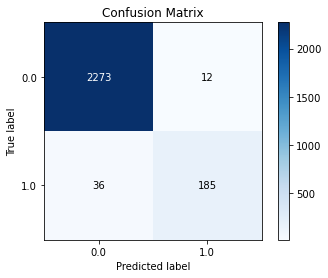

In [48]:
skplt.plot_confusion_matrix(y_test, y_pred)

**Run SVM with linear kernel and C=100.0**

In [49]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9777


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

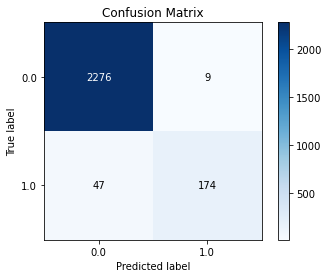

In [50]:
skplt.plot_confusion_matrix(y_test, y_pred)

**Run SVM with linear kernel and C=1000.0**

In [51]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9781


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

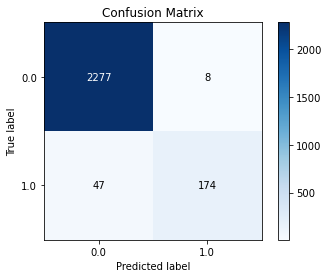

In [52]:
skplt.plot_confusion_matrix(y_test, y_pred)

we can see that the accuracy with C=1000.0 is similar as compared to C=1

Here, `y_test` are the true class labels and `y_pred` are the predicted class labels in the test-set.

**Compare the train-set and test-set accuracy**

In [53]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train


array([0., 0., 0., ..., 1., 0., 0.])

In [54]:
sum(y_pred_train)

758.0

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9755


We can see that the training set and test-set accuracy are very much comparable.

### Run SVM with Polynomial Kernel

**Run SVM with polynomial kernel and C=1.0**

In [56]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9749


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

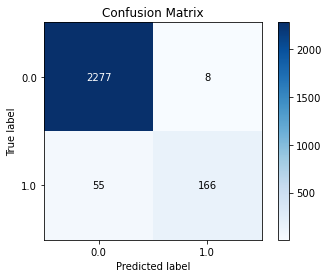

In [57]:
skplt.plot_confusion_matrix(y_test, y_pred)

**Run SVM with polynomial kernel and C=100.0**

In [58]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9792


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

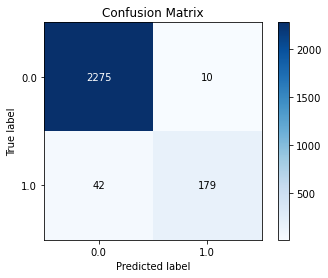

In [59]:
skplt.plot_confusion_matrix(y_test, y_pred)

There is a slight improvement in the accuracy score from 0.9749 to 0.9792 when C value i changed from 1.0 to 100.0.

###  Run SVM with sigmoid kernel

**Run SVM with sigmoid kernel and C=1.0**

In [60]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8767


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

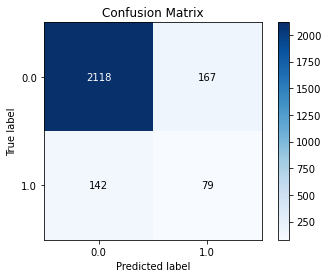

In [61]:
skplt.plot_confusion_matrix(y_test, y_pred)

**Run SVM with sigmoid kernel and C=100.0**

In [62]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8767


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

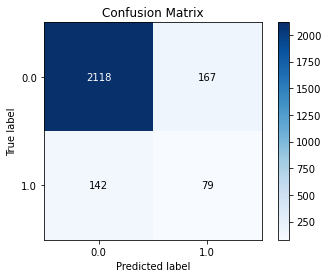

In [63]:
skplt.plot_confusion_matrix(y_test, y_pred)

Model accuracy is the same even after increasing the value of C.

**Check for overfitting and underfitting**

In [64]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9755
Test set score: 0.9781


These two values are quite comparable. So, there is no question of overfitting.

**Compare model accuracy with null accuracy**

In [65]:
# check class distribution in test set

y_test.value_counts()

0.0    2285
1.0     221
Name: target_class, dtype: int64

We can see that the occurences of most frequent class 0 is 2285. So, we can calculate null accuracy by dividing 2285 by total number of occurences.

In [66]:
# check null accuracy score

null_accuracy = (2285/(2285+221))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9118


We can see that our model accuracy score is 0.9755 but null accuracy score is 0.9118. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

### Applying the model to Test data

In [67]:
test_X = testdata.drop(['target_class'], axis=1)

test_y = traindata['target_class']

**Applying default SVM to Test data**

In [68]:
traindatafeatures = X_train_tot
traindatatarget = y_train_tot

testdatafeatures = test_X
testdatatarget = test_y

In [69]:
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(traindatafeatures,traindatatarget)


# make predictions on test set
testdatatarget=svc.predict(testdatafeatures)



In [70]:
y_pred2 = linear_svc.predict(testdatafeatures)
y_pred2

array([1., 1., 1., ..., 1., 1., 1.])

In [71]:
print(svc.predict(testdatafeatures))

[0. 0. 0. ... 0. 0. 0.]


In [72]:
sum(svc.predict(testdatafeatures))

381.0

In [73]:
testdata['target_class'].value_counts()

Series([], Name: target_class, dtype: int64)

**Applying Linear SVM to test data**

In [74]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(traindatafeatures,traindatatarget)


# make predictions on test set
y_pred_test=linear_svc.predict(testdatafeatures)

In [75]:
sum(linear_svc.predict(testdatafeatures))

400.0

**Applying Polynomial SVM to test data**

In [76]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(traindatafeatures,traindatatarget)


# make predictions on test set
y_pred=poly_svc100.predict(testdatafeatures)

In [77]:
sum(poly_svc100.predict(testdatafeatures))

403.0

**Applying Sigmoid SVM to test data**

In [78]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(traindatafeatures,traindatatarget)


# make predictions on test set
y_pred=sigmoid_svc.predict(testdatafeatures)

In [79]:
sum(sigmoid_svc.predict(testdatafeatures))

475.0

## Confusion Matrix